**Загрузка библиотек**

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

**Загрузка датасета**

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/sanyathisside/Predicting-Heart-Disease-using-Machine-Learning/master/heart-disease.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Подготовка данных**

In [3]:
X = data.drop(['target'], axis=1)
y = data['target']

Разделение данных на тренировочные и тестовые

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

**Обучение с помощью метода Random Forest**

In [6]:
np.random.seed(0)
clf_rf =  RandomForestClassifier(10, max_depth=5)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10)

**Предсказание**

In [8]:
prediction = clf_rf.predict(X_test)
prediction

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0])

**Расчёт важности переменных для классификации**

*Расчет точност и модели*

In [9]:
clf_rf.score(X_test, y_test)

0.82

*Сортировка по важности переменных с визуадизацией*

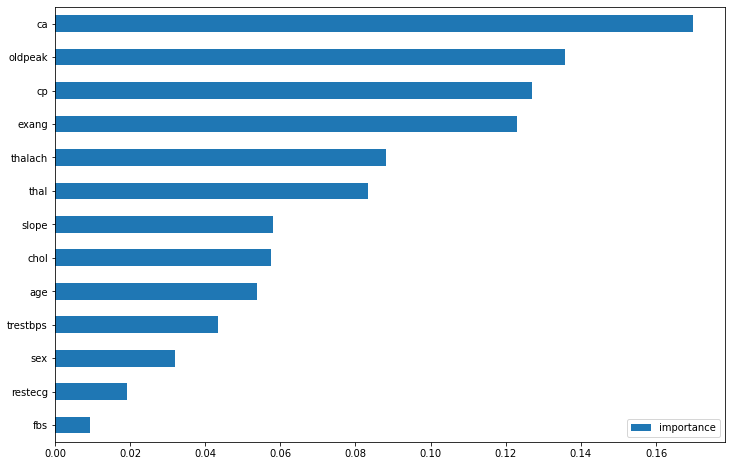

In [10]:
feature_importances = clf_rf.feature_importances_
feature_importances_df = pd.DataFrame(clf_rf.feature_importances_, index=X_train.columns, columns=['importance'])
feature_importances_df.sort_values('importance').plot(kind='barh', figsize=(12, 8))